# Dataset A models

Models evaluated:
- A neural network
- Random Forest 
- LightGBM

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("Model A dataset/lifestyle_dataset.csv")

In [3]:
dataset.head(10)

,Age,Alcohol Intake,BMI,Cardiovascular Disease,Gender,Physical Activity,Smoking Status
0,55,0,27.6,1,1,0,0
1,57,1,25.0,0,2,1,1
2,49,0,25.8,0,2,1,0
3,55,0,29.7,0,2,1,0
4,53,0,23.5,1,1,1,0
5,21,0,26.0,0,1,1,0
6,52,0,32.0,0,2,1,1
7,72,0,37.0,0,1,0,0
8,62,0,38.2,1,1,1,0
9,42,0,27.0,0,2,1,0


## Model Training 

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import tensorflow as tf
import matplotlib.pyplot as plt

X = dataset.drop(['Cardiovascular Disease'], axis=1)
Y = dataset['Cardiovascular Disease']

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2, 
    random_state=42,
    stratify=Y 
)

#### 1) Neural Network 

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,Age,Alcohol Intake,BMI,Gender,Physical Activity,Smoking Status
0,-0.048013,-0.257709,0.299146,1.178569,0.520896,-0.588409
1,-0.486777,-0.257709,0.059672,1.178569,0.520896,-0.588409
2,-1.218051,-0.257709,-1.821907,-0.848487,0.520896,1.699499
3,-0.486777,-0.257709,-0.966644,1.178569,-1.919767,-0.588409
4,0.463879,-0.257709,-0.419275,1.178569,0.520896,-0.588409


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=500)

Epoch 1/500


C:\Users\adibs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1433/1433 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7100 - loss: 0.6100
Epoch 2/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7108 - loss: 0.5669  
Epoch 3/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7121 - loss: 0.5636
Epoch 4/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7132 - loss: 0.5592
Epoch 5/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7143 - loss: 0.5568
Epoch 6/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7136 - loss: 0.5534
Epoch 7/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7128 - loss: 0.5537
Epoch 8/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7155 - loss: 0.5513
Epoch 9/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7147 - loss: 0.5496
Epoch 10/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7151 - loss: 0.5484
Epoch 11/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.7142 - loss: 0.5463
Epoch 12/500
1433/1433 ━━━━

In [7]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7262 - loss: 0.5113
Test Loss: 0.5112773180007935, Test Accuracy: 0.7262018918991089


In [8]:
scaledModel = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

scaledModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = scaledModel.fit(X_train_scaled, Y_train, epochs=500)

Epoch 1/500


C:\Users\adibs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.7161 - loss: 0.5427
Epoch 2/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7255 - loss: 0.5257
Epoch 3/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7269 - loss: 0.5228
Epoch 4/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7271 - loss: 0.5210
Epoch 5/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7274 - loss: 0.5193
Epoch 6/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7286 - loss: 0.5182
Epoch 7/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7308 - loss: 0.5172
Epoch 8/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7302 - loss: 0.5164
Epoch 9/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7298 - loss: 0.5157
Epoch 10/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7327 - loss: 0.5148
Epoch 11/500
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7334 - loss: 0.5144
Epoch 12/500
1433/143

In [9]:
loss, accuracy = scaledModel.evaluate(X_test_scaled, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.7485 - loss: 0.4993
Test Loss: 0.4993206262588501, Test Accuracy: 0.7485384941101074


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
Raw model:
Precision: 0.5356200527704486
Recall: 0.1891891891891892
ROC-AUC: 0.7408174958213031

Scaled model:
Precision: 0.5977945443993036
Recall: 0.3199751475613545
ROC-AUC: 0.7616317524127815


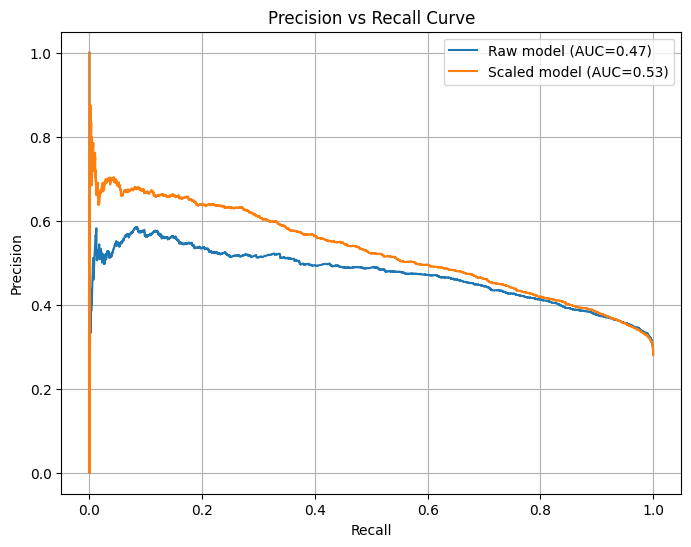

In [10]:
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for the positive class
y_prob = model.predict(X_test)  # or model_raw.predict_proba(X_test)[:, 1] depending on framework
y_prob_scaled = scaledModel.predict(X_test_scaled)  # same note as above

# Compute precision, recall, and AUC for raw model
precision, recall, _ = precision_recall_curve(Y_test, y_prob)
aucModel = auc(recall, precision)

# Compute precision, recall, and AUC for scaled model
precision_scaled, recall_scaled, _ = precision_recall_curve(Y_test, y_prob_scaled)
auc_scaled = auc(recall_scaled, precision_scaled)

# Print precision, recall, and AUC summary (using average metrics if needed)
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Binary predictions (default 0.5 threshold)
y_pred = (y_prob >= 0.5).astype(int)
y_pred_scaled = (y_prob_scaled >= 0.5).astype(int)

print("Raw model:")
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob))

print("\nScaled model:")
print("Precision:", precision_score(Y_test, y_pred_scaled))
print("Recall:", recall_score(Y_test, y_pred_scaled))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob_scaled))

# Plot Precision-Recall curves
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Raw model (AUC={aucModel:.2f})')
plt.plot(recall_scaled, precision_scaled, label=f'Scaled model (AUC={auc_scaled:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


#### 2) Other models

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [12]:
lgbm_model = lgb.LGBMClassifier(objective = 'binary', n_estimators=100, learning_rate=0.05, random_state=42)
lgbm_model.fit(X_train, Y_train)

y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12876, number of negative: 32967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 45843, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280872 -> initscore=-0.940142
[LightGBM] [Info] Start training from score -0.940142


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step

------Performance Metrics------

Neural Network:
Accuracy: 0.7262
Precision: 0.5356
Recall: 0.1892
F1-score: 0.2796
ROC-AUC: 0.7408
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      8242
           1       0.54      0.19      0.28      3219

    accuracy                           0.73     11461
   macro avg       0.64      0.56      0.56     11461
weighted avg       0.69      0.73      0.68     11461


Scaled Neural Network:
Accuracy: 0.7485
Precision: 0.5978
Recall: 0.3200
F1-score: 0.4168
ROC-AUC: 0.7616
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      8242
           1       0.60      0.32      0.42      3219

    accuracy                           0.75     11461
   macro avg       0.69      0.62      0.63     11461
weighted avg       0.73      0.75      0.72     11461


Random Forest:
Accu

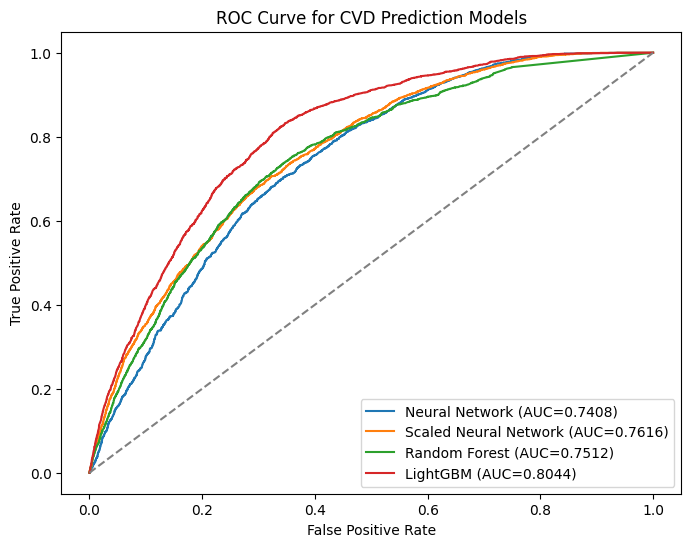

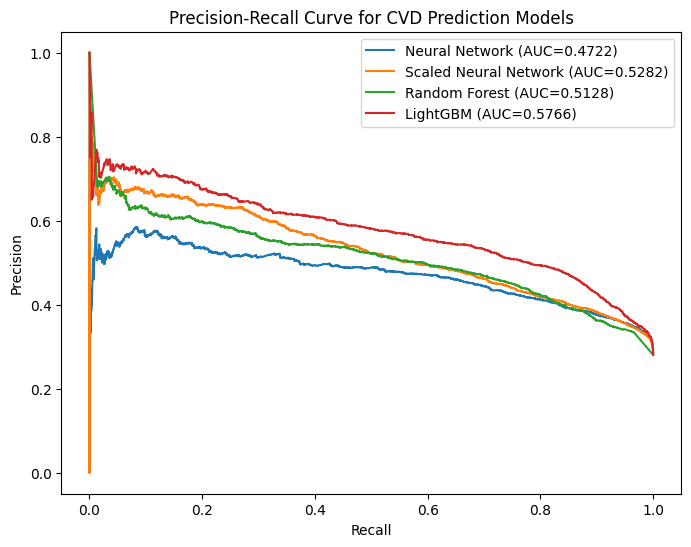

In [14]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve, auc, classification_report
)

y_prob_nn = model.predict(X_test).flatten()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

y_prob_scaled_nn = scaledModel.predict(X_test_scaled).flatten()
y_pred_scaled_nn = (y_prob_scaled_nn >= 0.5).astype(int)

model_predictions = {
    'Neural Network': (y_pred_nn, y_prob_nn),
    'Scaled Neural Network': (y_pred_scaled_nn, y_prob_scaled_nn),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'LightGBM': (y_pred_lgbm, y_prob_lgbm)
}

print("\n------Performance Metrics------")
for model_name, (y_pred, y_proba) in model_predictions.items():
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_proba)

    print(f"\n{model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(Y_test, y_pred))

plt.figure(figsize=(8, 6))
for model_name, (y_pred, y_proba) in model_predictions.items():
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    auc_score = roc_auc_score(Y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc_score:.4f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CVD Prediction Models")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for model_name, (y_pred, y_proba) in model_predictions.items():
    precision, recall, _ = precision_recall_curve(Y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (AUC={pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for CVD Prediction Models")
plt.legend()
plt.show()

### Saving Models


✅ Models saved in 'Saved Models A' folder

Neural Network:
Accuracy: 0.7262
Precision: 0.5356
Recall: 0.1892
F1-score: 0.2796
ROC-AUC: 0.7408
PR-AUC: 0.4722
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      8242
           1       0.54      0.19      0.28      3219

    accuracy                           0.73     11461
   macro avg       0.64      0.56      0.56     11461
weighted avg       0.69      0.73      0.68     11461


Scaled Neural Network:
Accuracy: 0.7485
Precision: 0.5978
Recall: 0.3200
F1-score: 0.4168
ROC-AUC: 0.7616
PR-AUC: 0.5282
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      8242
           1       0.60      0.32      0.42      3219

    accuracy                           0.75     11461
   macro avg       0.69      0.62      0.63     11461
weighted avg       0.73      0.75      0.72     11461


Random Forest:
Accuracy: 0.7362
Precision: 0.5374
Recall: 0.4377
F

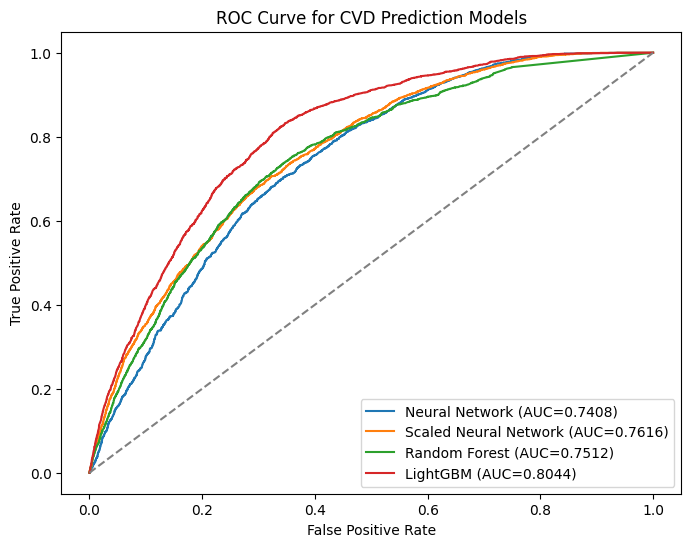

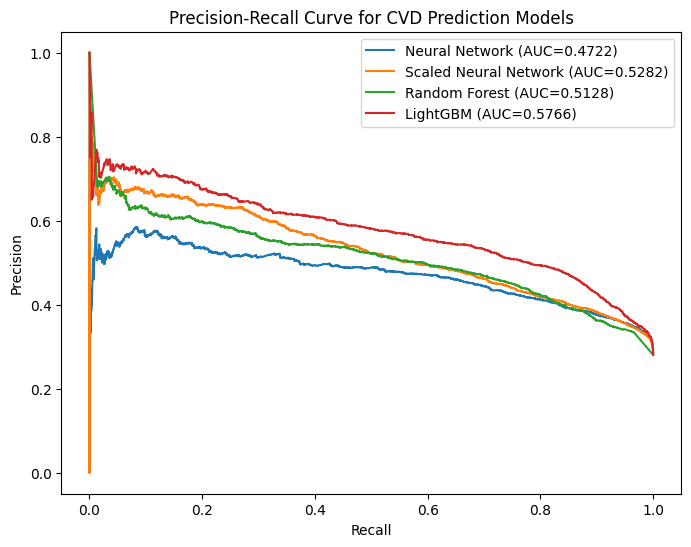

✅ Metrics summary saved as 'Saved Models A/model_metrics_summary.csv'


In [16]:
import os
import joblib


os.makedirs("Saved Models A", exist_ok=True)

# Models dictionary for saving
models = {
    'Random Forest': rf_model,
    'LightGBM': lgbm_model
}

model.save("Saved Models A/neural_network.keras")
scaledModel.save("Saved Models A/scaled_neural_network.keras")

joblib.dump(models['Random Forest'], "Saved Models A/random_forest.joblib")

if hasattr(models['LightGBM'], "booster_"):
    models['LightGBM'].booster_.save_model("Saved Models A/lightgbm_model.txt")
else:
    joblib.dump(models['LightGBM'], "Saved Models A/lightgbm_model.joblib")

print("✅ Models saved in 'Saved Models A' folder")

# --------- PERFORMANCE METRICS & CSV EXPORT ---------
metrics_list = []

plt.figure(figsize=(8, 6))
for model_name, (y_pred, y_proba) in model_predictions.items():
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_proba)

    # PR AUC
    precision_curve, recall_curve, _ = precision_recall_curve(Y_test, y_proba)
    pr_auc = auc(recall_curve, precision_curve)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    })

    # Print metrics in console
    print(f"\n{model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print(classification_report(Y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.4f})")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CVD Prediction Models")
plt.legend()
plt.show()

# PR Curve Plot
plt.figure(figsize=(8, 6))
for model_name, (y_pred, y_proba) in model_predictions.items():
    precision_curve, recall_curve, _ = precision_recall_curve(Y_test, y_proba)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f"{model_name} (AUC={pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for CVD Prediction Models")
plt.legend()
plt.show()

# Save metrics as CSV
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv("Saved Models A/model_metrics_summary.csv", index=False)
print("✅ Metrics summary saved as 'Saved Models A/model_metrics_summary.csv'")
